# Calculo diferencial Parte:2.
## Regla de la cadena

In [ ]:

from  sympy import Function, symbols, diff
import sympy as sp
x,y = symbols('x y')
f,g = symbols('f g ', cls=Function)
g=g(x)
f = f(x + g) # composicion de funciones
f

f(x + g(x))

In [ ]:
# sacamos la derivada
dfdx = diff(f, x)
dfdx


(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [ ]:
# susticiones
dfdx.subs (   [ (g, sp.sin(x))])

(Derivative(sin(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [ ]:
# sustituyamos ambos, f, g
dfdx.subs (  [ (g, sp.sin(x)), (f, sp.cos(x))]).doit() # por que no sustituyo f(x) ?

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

## Actividad #1
Arregle el problema de la celda anterior de por que la $f$ no
se sustituyo.

**bono**: Esta actividad es voluntaria, y si la hace correctamente
subo 2 decimas a su nota final.

In [ ]:
x,y = symbols('x  y')
f,g = symbols('f g', cls=Function)

g=g(x)
f=f(g) # composicion de funciones
display(f)

dfdx = diff(f,x)
dfdx # la regla de la cadena clasica


f(g(x))

Derivative(f(g(x)), g(x))*Derivative(g(x), x)

In [ ]:
# sustituciones
xi = symbols('xi')
dfdx.subs ( [ (xi, sp.sin(x)), (f, sp.cos(x)), (g, sp.sin(x))]).doit()

0

In [ ]:
dfdx.subs(f, sp.cos(xi)).subs(g, sp.sin(x))

Derivative(sin(x), x)*Subs(Derivative(cos(xi), _xi), _xi, sin(x))

In [ ]:
dfdx.subs(f,sp.cos(x)).subs(g, sp.sin(x)).doit()

0

## Actividad #2
La derivada anterior no debe ser 0, por que?

Tenemos $g(x)=\sin x$, $f(x)= \cos x$ de forma que

$$f(g(x))=\cos (\sin (x)) .$$

Saquemos la derivada con lo que aprendimos en nuestro curso de calculo diferencia.

$$ \frac{df}{dx} = \frac{df}{dg} \frac{dg}{dx} = -\sin( \sin x)  \cos x = - \sin( \sin x) \cos x   .$$



$$ f(x) = \left (\frac{1 + \sin x}{1 - \cos x} \right )^2 $$

In [ ]:
# otra derivada interesante
dfdx = diff(((1 + sp.sin(x))/(1 - sp.cos(x)))**2, x)
dfdx

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

In [ ]:
dfdx.together()

2*((1 - cos(x))*cos(x) - (sin(x) + 1)*sin(x))*(sin(x) + 1)/(1 - cos(x))**3

In [ ]:
from sympy import simplify
simplify(dfdx)

2*(-sqrt(2)*cos(x + pi/4) + 1)*(sin(x) + 1)/(cos(x) - 1)**3

### Logarithmo

In [ ]:
from sympy import log
x = symbols('x')
diff(log(x))

1/x

In [ ]:
diff (log(x, 10))

1/(x*log(10))

### Cuatro formas de calcular derivadas

In [ ]:
f=x**2
diff(f,x)

2*x

In [ ]:
diff(f)

2*x

In [ ]:
diff(f,x,1)

2*x

In [ ]:
f.diff(x)

2*x

## Ejemplo de encontrar extremos.
Tomado de ScackOverflow

Encontrar los maximos/minimos de la funcion
$f(x)=x \mathrm{e}^{-x^2/10}.$

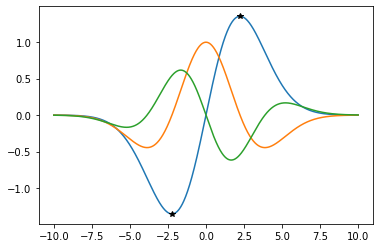

In [ ]:
from sympy import solve, exp,  lambdify
import matplotlib.pyplot as plt
import numpy as np

x = symbols('x')
equation = x*exp(-x**2/10)
firstDeriv = equation.diff(x)
secondDeriv = firstDeriv.diff(x)


# puntos criticos\
criticalPoints = solve(firstDeriv, x)  # abscisas, x
criticalPointsY = [ equation.subs(x,a)  for a in criticalPoints] # ordenadas y

# dominio de la funcion
xx = np.linspace(-10, 10, 1000)

yy= lambdify(x, [equation, firstDeriv, secondDeriv])(xx)

# graficamos
plt.plot(xx, np.transpose(yy))
plt.plot(criticalPoints, criticalPointsY, "k*")
plt.show()



## Actividad #3
Poner las leyendas en la grafica anterior. (etiquetas, demas)

# Calculo Integral

## antiderivadas basicas

Verificamos que

$$\int \cot(x) \csc (x) dx = -\frac{1}{\sin x} + C =- \csc x + C .$$

In [ ]:
from sympy import integrate, symbols
x = symbols('x')
integrate(sp.cot(x)*sp.csc(x),x) # observe que la constante C no se muestra en integracion

-1/sin(x)

In [ ]:
# derivada de una potencia
y = symbols('y')
f = x**y
fint = integrate(f,x)
fint

Piecewise((x**(y + 1)/(y + 1), Ne(y, -1)), (log(x), True))

In [ ]:
type(fint)

Piecewise

In [ ]:
h=x**3
h*fint

x**3*Piecewise((x**(y + 1)/(y + 1), Ne(y, -1)), (log(x), True))

In [ ]:
(h*fint).simplify()

Piecewise((x**(y + 4)/(y + 1), Ne(y, -1)), (x**3*log(x), True))

## Problemas de valor inicial IVP:Initial Value Problems
Este tema es de ecuaciones diferenciales que lo vamos a ver pronto pero esto es una pequena introduccion.

Resuelva:

$$ \frac{dy}{dt} = t^2 + 1 \quad , \quad y(1)=4 .$$
para la funcion $y$

In [ ]:
# integramo y
t = symbols('t')
integral = integrate(t**2 +1)
integral

t**3/3 + t

In [ ]:
C = symbols('C')
y = integral + C  # se introduce la constante C  a la fuerza
y

C + t**3/3 + t

In [ ]:
# condicion inicial
ysubs = y.subs(t,1)
ysubs

C + 4/3

In [ ]:
# resolvemos la condicion inicial
from sympy import solve
Ceval = solve( ysubs -4, C)  # aplica la condicion inicial
Ceval

[8/3]

In [ ]:
ysub = y.subs(C, Ceval[0])
ysub

t**3/3 + t + 8/3

# Actividad 4
Resuelva el probelma de valor inicial

$$ y'=\cot t \csc t \quad , \quad y(\pi/2)= -1.$$